## S&P and Wei's Pricing Model

In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from  InvarianceTestEllipsoid import InvarianceTestEllipsoid
from autocorrelation import autocorrelation
from scipy import stats
import scipy.signal as sig
import statsmodels.api as sm
import statsmodels
from statsmodels.graphics.api import qqplot
import arch 
Tin = pd.read_pickle("C:\\Users\\islipd\\Documents\\Thesis Notebooks\\Tout.pkl")

eta = pd.read_pickle("C:\\Users\\islipd\\Documents\\Thesis Notebooks\\Tinnov.pkl")

Pin = pd.read_pickle("C:\\Users\\islipd\\Documents\\Thesis Notebooks\\Pout.pkl")

full_data = pd.read_pickle("C:\\Users\\islipd\\Documents\\Thesis Notebooks\\kpi.pkl")

In [129]:
sp = pd.read_csv("SPX_index.csv",index_col="Date",parse_dates=True)
sp.index[1]
sp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2050-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
2050-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
2050-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
2050-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
2050-01-09,17.090000,17.090000,17.080000,17.080000,17.080000,3850000
2050-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000
2050-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000
2050-01-12,16.760000,16.760000,16.760000,16.760000,16.760000,2970000
2050-01-13,16.670000,16.670000,16.670000,16.670000,16.670000,3330000


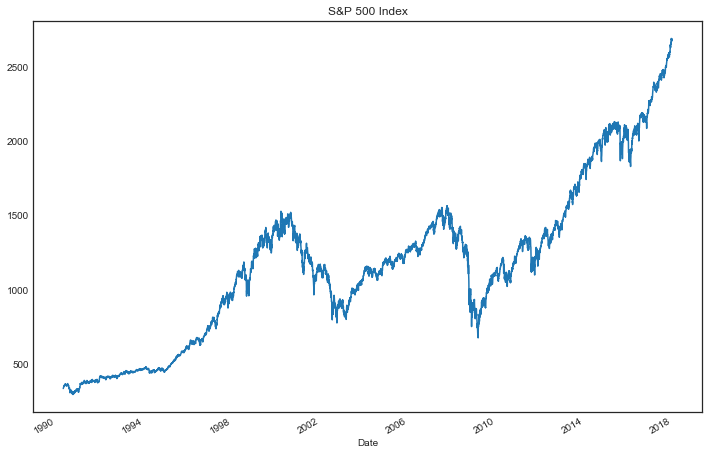

In [130]:
Y = sp['Adj Close']['1990-05-03':'2017-12-30']
fig = plt.figure(figsize=(12,8))

Y.plot(title = 'S&P 500 Index');


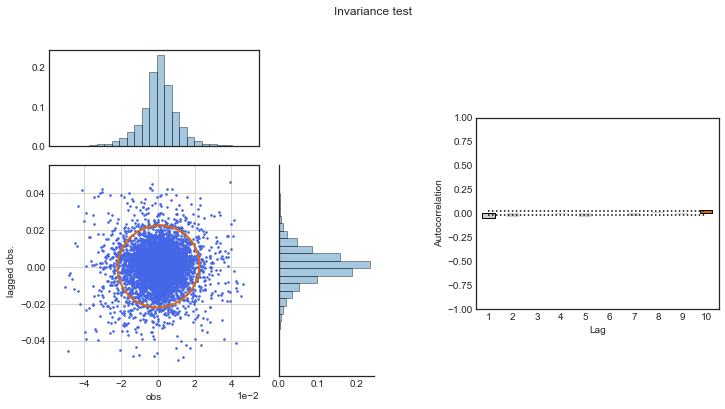

In [131]:
epsi = np.log(Y).diff()[1:]
epsi = np.expand_dims(epsi, axis=0)
lag_ = 10  # number of lags (for auto correlation test)
acf = autocorrelation(epsi, lag_)

lag = 10 # lag to be printed
ell_scale = 2  # ellipsoid radius coefficient
fit = 0  # normal fitting
fig = plt.figure(figsize=(12,6))
InvarianceTestEllipsoid(epsi, acf[0,1:], lag, fit, ell_scale);


In [132]:
model = statsmodels.tsa.ar_model.AR(np.log(Y))
fitted = model.fit( ic='bic')
n_lags = len(fitted.params)
n_lags

4

ar.L1.Adj Close    0.943436
ar.L2.Adj Close    0.011904
ar.L3.Adj Close    0.042672
ar.L4.Adj Close    0.001922
dtype: float64


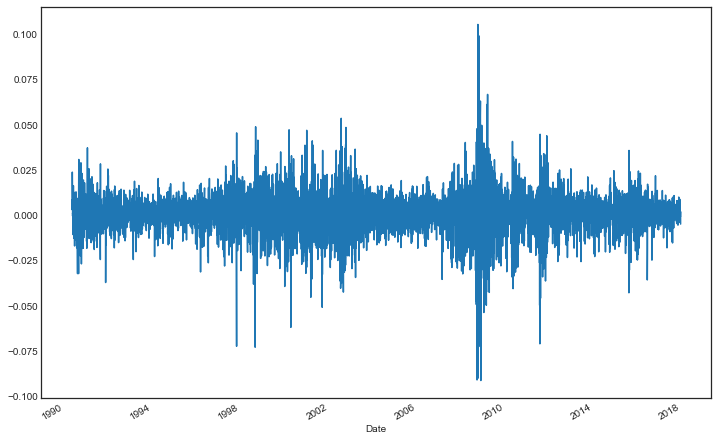

In [133]:
arma_mod = sm.tsa.ARMA(np.log(Y)-np.log(Y).mean(), (n_lags,0)).fit(trend='nc',disp=False)
print(arma_mod.params)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod.resid[1:].plot(ax=ax);


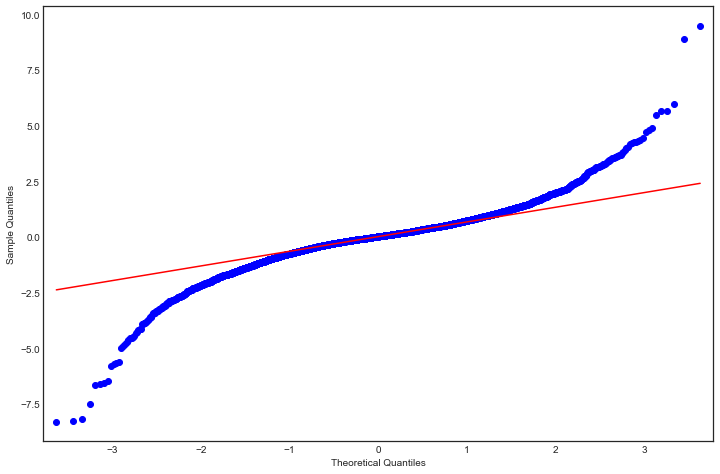

In [134]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod.resid[1:], line='q', ax=ax, fit=True)

In [135]:
print(arma_mod.summary())

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                 6971
Model:                     ARMA(4, 0)   Log Likelihood               21484.341
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 13 Jan 2018   AIC                         -42958.682
Time:                        17:10:13   BIC                         -42924.434
Sample:                    05-03-1990   HQIC                        -42946.878
                         - 12-29-2017                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ar.L1.Adj Close     0.9434      0.001   1227.121      0.000       0.942       0.945
ar.L2.Adj Close     0.0119      0.012      0.993      0.321      -0.012       0.035
ar.L3.Adj Close     0.0427      

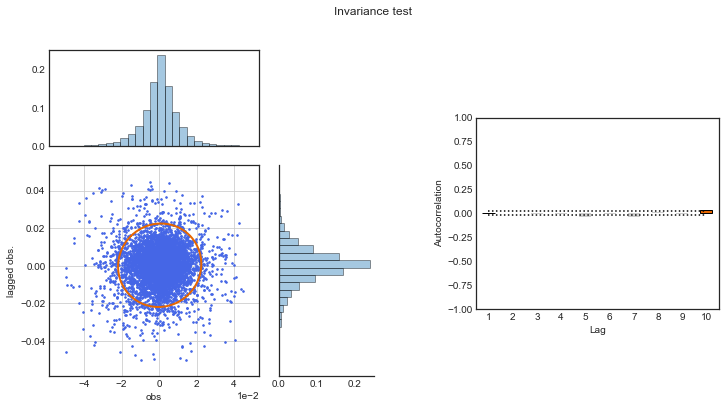

In [136]:
epsi = np.expand_dims(arma_mod.resid[1:], axis=0)
lag_ = 10  # number of lags (for auto correlation test)
acf = autocorrelation(epsi, lag_)

lag = 10 # lag to be printed
ell_scale = 2  # ellipsoid radius coefficient
fit = 0  # normal fitting
fig = plt.figure(figsize=(12,6))
InvarianceTestEllipsoid(epsi, acf[0,1:], lag, fit, ell_scale);

(2.678140237056708, 0.00020263748049009715, 0.0065975701760900805)

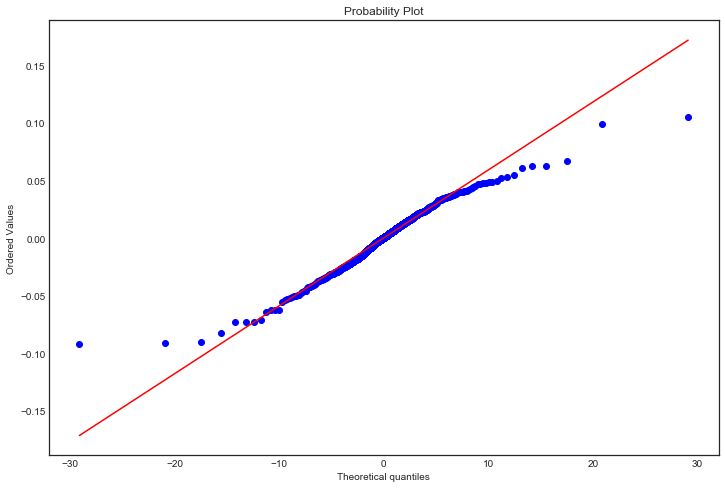

In [137]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
e = arma_mod.resid[1:]
t_params = stats.t.fit(e);
stats.probplot(e, sparams=t_params[0], dist='t', fit=True, plot=ax, rvalue=False);
t_params


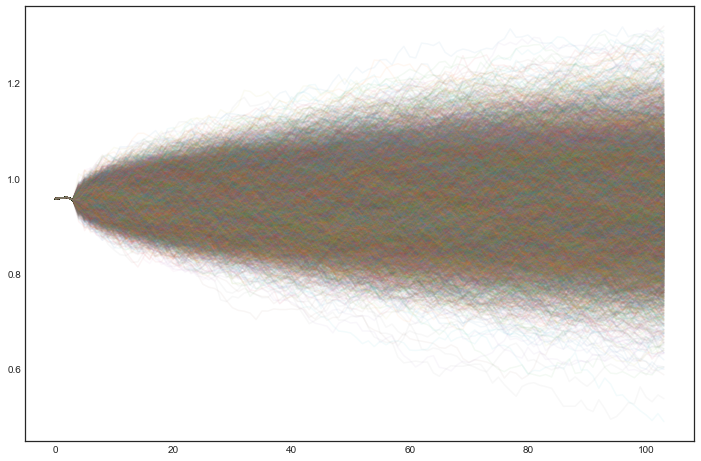

In [159]:
tau = 100
N = 10000
p = len(arma_mod.params)
lag_params = np.array(arma_mod.params)
X = np.log(Y) - np.log(Y).mean()
X_proj = np.zeros([tau+p,N])
X_proj[0:p,:] = np.outer(X[-p:],np.ones([1,N]))
for i in range(tau):
    #X_proj[p+i,:] = np.dot(lag_params[::-1],X_proj[i:p+i,:])+arma_mod.resid[1:].std()*np.random.normal(size = N)
    X_proj[p+i,:] = np.dot(lag_params[::-1],X_proj[i:p+i,:])+arma_mod.resid[1:].std()*np.random.standard_t(50,size = N)

fig = plt.figure(figsize=(12,8))
plt.plot(X_proj,alpha=0.05);